In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
sales = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Sales prediction\website\Weekly_Food_Retail_Prices.csv')

print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN


In [3]:
sales.describe()

,Retail Price
count,2.051754e+06
mean,8.385372e+01
std,1.486131e+02
min,-4.500000e+01
25%,1.900000e+01
50%,3.800000e+01
75%,8.500000e+01
max,2.004500e+04


In [4]:
# check unique values in dataset
sales.apply(lambda x: len(x.unique()))

State             30
Centre            86
Commodity         46
Variety           31
Unit              11
Category           1
Date            1053
Retail Price    2097
dtype: int64

In [5]:
# check for categorical columns
cat_col = []
for x in sales.dtypes.index:
    if sales.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['State', 'Centre', 'Commodity', 'Variety', 'Unit', 'Category', 'Date']

#### Defining the various categories in the 'Category' column

In [6]:
comm = sales['Commodity']
comm.head(3)

0    Apple
1    Apple
2    Apple
Name: Commodity, dtype: object

In [7]:
cat = sales['Category']
cat.head(3)

0    Food
1    Food
2    Food
Name: Category, dtype: object

In [8]:
df = pd.DataFrame()
df['Commodity'] = comm
df['Category'] = cat

# Create DataFrame
dff = pd.DataFrame()
dff['Dummy'] = df['Commodity'] + " " +  df['Category'].astype(str)
print(dff)

              Dummy
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [9]:
# Remove the 'Category' column
sales.drop(['Category'], axis=1, inplace=True)
sales.head(5)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,05/01/2001,NaN


In [10]:
dff.rename(columns = {'Dummy':'Category'}, inplace = True)
print(dff)

           Category
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [11]:
sales = pd.concat([sales, dff], axis=1)
sales.head(5)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food


In [12]:
# After extracting and joining the 2 columns, we need to define the category
def category(x):
    if x == 'Apple Food' or x == 'Banana Food' or x == 'Coconut Food':
        return 'Fruits'
    elif x == 'Fish Food' or x == 'Meat Food' or x == 'Chicken Food' or x == 'Eggs Food':
        return 'Non-veg products'
    elif x == 'Milk Food' or x == 'Butter Food' or x == 'Ghee Food':
        return 'Milk products'
    elif x == 'Potato Food' or x == 'Onion Food' or x == 'Brinjal Food' or x == 'Red Chillies Food' or x == 'Coriander Food' or x == 'Tomato Food':
        return 'Vegetables'
    elif x == 'Mustard Oil Food' or x == 'Groundnut Oil Food' or x == 'Coconut Oil Food' or x == 'Gingelly Oil Food' or x == 'Vanaspati Food':
        return 'Oil'
    elif x == 'Salt Food' or x == 'Sugar Food' or x == 'Gur Food' or x == 'Black Pepper Food' or x == 'Turmeric Food' or x == 'Cummin Seed Food':
        return 'Spices'
    elif x == 'Coffee Food' or x == 'Tea Food':
        return 'Beverages'
    elif x == 'Moong Food' or x == 'Urad Food' or x == 'Masur Food' or x == 'Arhar Food' or x == 'Gram Food':
        return 'Dal'
    elif x == 'Jowar Food' or x == 'Maida Food' or x == 'Atta Food' or x == 'Wheat Food' or x == 'Bajra Food' or x == 'Ragi Food' or x == 'Maize Food' or x == 'Besan Food':
        return 'Flour'
    else:
        return 'Grocery'

sales['Category'] = sales['Category'].apply(lambda x: category(x))

In [13]:
# Re-ordering the columns
sales = sales.reindex(columns=['State', 'Centre', 'Category', 'Commodity', 'Variety', 'Unit', 'Date', 'Retail Price'])
print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN


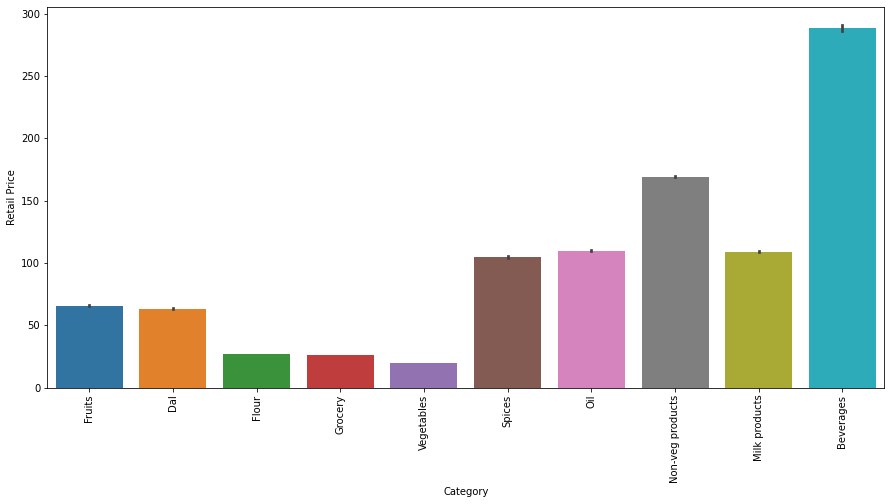

In [14]:
# Visualize the retail prices of the categories
plt.figure(figsize=(15,7))
sns.barplot(x=sales['Category'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

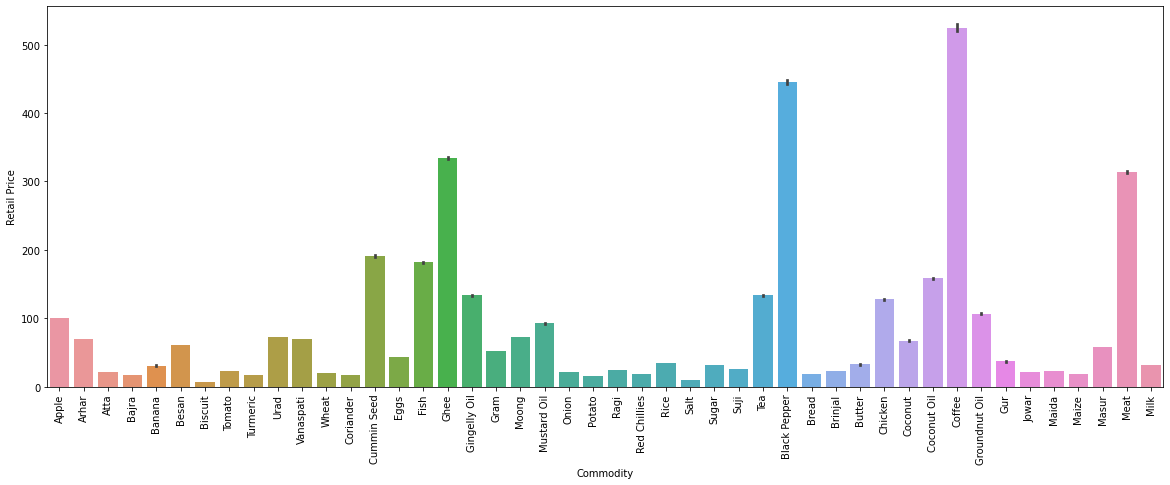

In [15]:
# Visualize the retail prices of the various commodities
plt.figure(figsize=(20,7))
sns.barplot(x=sales['Commodity'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

#### Get the average price of categories per state

In [16]:
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',  'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',  'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',  'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
categories = ['Fruits', 'Dal', 'Flour', 'Grocery', 'Vegetables', 'Spices', 'Fish', 'Milk products', 'Oil', 'Beverages', 'Meat']

def mean_retail_categories(state, category):
    x = (sales['State'] == state)
    y = (sales['Category'] == category)
    
    s1 = sales[x & y & (sales['Retail Price'] > 0)]
    
    for state in states:
        for category in categories:
            return s1['Retail Price'].mean()

In [17]:
# Calling the func with custom values
mean_retail_categories("Bihar", "Fruits")

81.35905788023052

In [18]:
mean_retail_categories("Assam", "Fruits")

62.85070214338507

#### Get the average price of commodities per state

In [19]:
commodities = ['Apple', 'Arhar', 'Atta', 'Bajra', 'Banana', 'Besan', 'Biscuit', 'Tomato', 'Turmeric', 'Urad', 'Vanaspati', 'Wheat', 'Coriander', 'Cummin Seed', 'Eggs', 'Fish', 'Ghee', 'Gingelly Oil', 'Gram', 'Moong', 'Mustard Oil', 'Onion', 'Potato', 'Ragi', 'Red Chillies', 'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Black Pepper', 'Bread', 'Brinjal', 'Butter', 'Chicken', 'Coconut', 'Coconut Oil', 'Coffee', 'Groundnut Oil', 'Gur', 'Jowar', 'Maida', 'Maize', 'Masur', 'Meat', 'Milk']
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',  'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',  'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',  'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

def mean_retail_products(state, commodity):
    x = (sales['State'] == state)
    y = (sales['Commodity'] == commodity)
    
    s2 = sales[x & y & (sales['Retail Price'] > 0)]
    
    for state in states:
        for commodity in commodities:
            return s2['Retail Price'].mean()

In [20]:
# Calling the func with custom values
mean_retail_products("Bihar", "Apple")

82.38476755687438

In [21]:
mean_retail_products("Assam", "Apple")

114.86101694915254

### Data Processing

In [22]:
# Let's check for null values
sales.isnull().sum()

State                 0
Centre                0
Category              0
Commodity             0
Variety          890838
Unit                  0
Date                  0
Retail Price    2993169
dtype: int64

In [23]:
sales['Variety'].unique()

array(['Delicious medium size', 'Split', 'FAQ', nan, 'Glucose',
       'Powdered Agmark', 'Desi', 'Kalyan HYV', 'Common', 'Cat Fish',
       'Pomphret', 'Rohu 1Kg Size', 'Whole', 'Common/Coarse', 'Fine',
       'Superfine', 'Loose(common)', 'Packet(iodized)',
       'Brooke Bond Red Label', 'Ctc(loose)', 'Local', 'Amul/Any Other',
       'Poultry', 'Dry', 'Fresh', 'Instant', 'Powdered', 'White',
       'Mutton', 'Cow/Buffalo', 'Dairy'], dtype=object)

In [24]:
# There are 890838 missing values in 'Variety', so fill it
sales["Variety"].fillna("FAQ", inplace = True)

In [25]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
6,Assam,Dispur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
8,Assam,Silchar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN


In [26]:
# There are 2993169 missing values in 'Retail Price', so fill it
sales['Retail Price'] = sales['Retail Price'].fillna(sales['Retail Price'].median())

In [27]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
6,Assam,Dispur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
8,Assam,Silchar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0


In [28]:
sales['Retail Price'].unique()

array([  38. ,   24. ,   19. , ..., 1133. ,   91.5,  746. ])

In [29]:
# Dealing with the 'Unit' column
sales['Unit'].unique()

array(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg',
       '250gm. Pkt', '400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'],
      dtype=object)

In [30]:
sales['Unit'].replace(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg', '250gm. Pkt','400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'], 
                      ['1 Kg', '1 Dozen', '80gm Packet', '100gm Packet', '1 Kg/Litre', '1 Kg', '250gm Packet', '800 Gm', '1 Piece', '500gm Packet', '1 Litre'], inplace=True)

In [31]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
6,Assam,Dispur,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
8,Assam,Silchar,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0


In [32]:
# analysing the 'Date' column
sales['Date'].value_counts()

05/01/2001    4791
11/04/2014    4791
25/04/2014    4791
02/05/2014    4791
09/05/2014    4791
              ... 
02/11/2007    4791
09/11/2007    4791
16/11/2007    4791
23/11/2007    4791
05/03/2021    4791
Name: Date, Length: 1053, dtype: int64

In [33]:
# Create DataFrame
date = sales['Date']

df = pd.DataFrame()
df['date'] = date
print(df)

               date
0        05/01/2001
1        05/01/2001
2        05/01/2001
3        05/01/2001
4        05/01/2001
...             ...
5044918  05/03/2021
5044919  05/03/2021
5044920  05/03/2021
5044921  05/03/2021
5044922  05/03/2021

[5044923 rows x 1 columns]


In [34]:
# split column into multiple columns by delimiter 
df[['Date', 'Month', 'Year']] = df['date'].str.split('/', expand=True)
df

,date,Date,Month,Year
0,05/01/2001,05,01,2001
1,05/01/2001,05,01,2001
2,05/01/2001,05,01,2001
3,05/01/2001,05,01,2001
4,05/01/2001,05,01,2001
...,...,...,...,...
5044918,05/03/2021,05,03,2021
5044919,05/03/2021,05,03,2021
5044920,05/03/2021,05,03,2021
5044921,05/03/2021,05,03,2021


In [35]:
# creating a new dataframe
dff = pd.DataFrame()
dff['Month'] = df['Month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11','12'], 
                                   ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
dff

,Month
0,January
1,January
2,January
3,January
4,January
...,...
5044918,March
5044919,March
5044920,March
5044921,March


In [36]:
sales = pd.concat([sales, dff], axis=1)
sales.head(5)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price,Month
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0,January
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0,January
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0,January
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0,January
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1 Kg,05/01/2001,38.0,January


In [37]:
# Remove the 'Date' column
sales.drop(['Date'], axis=1, inplace=True)
sales.head(5)

,State,Centre,Category,Commodity,Variety,Unit,Retail Price,Month
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1 Kg,38.0,January
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1 Kg,38.0,January
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1 Kg,38.0,January
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1 Kg,38.0,January
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1 Kg,38.0,January


In [38]:
# Re-ordering the columns
sales = sales.reindex(columns=['State', 'Centre', 'Category', 'Commodity', 'Variety', 'Unit', 'Month', 'Retail Price'])
print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Category,Commodity,Variety,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1 Kg,January,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1 Kg,January,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1 Kg,January,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1 Kg,January,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1 Kg,January,38.0


In [39]:
# Grouping the rows and averaging the Retail Price
sales = sales.groupby(['State', 'Centre', 'Commodity', 'Variety', 'Category', 'Unit', 'Month'], axis=0, as_index=False).mean()

sales.head(10)

,State,Centre,Commodity,Variety,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,April,87.529412
1,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,August,92.888889
2,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,December,84.080460
3,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,February,86.858824
4,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,January,84.946237
5,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,July,96.056818
6,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,June,93.465116
7,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,March,88.188889
8,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,May,95.449438
9,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,November,78.620690


#### Visualizing the 'target' variable

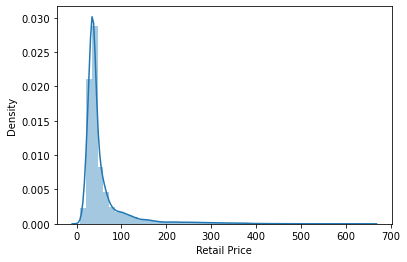

In [40]:
sns.distplot(sales['Retail Price'])
plt.show()

In [41]:
# Let's check if any more missing values present
sales.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Category        0
Unit            0
Month           0
Retail Price    0
dtype: int64

#### Visualizing the categorical variables

In [42]:
# check for categorical columns
cat_col = []
for x in sales.dtypes.index:
    if sales.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['State', 'Centre', 'Commodity', 'Variety', 'Category', 'Unit', 'Month']

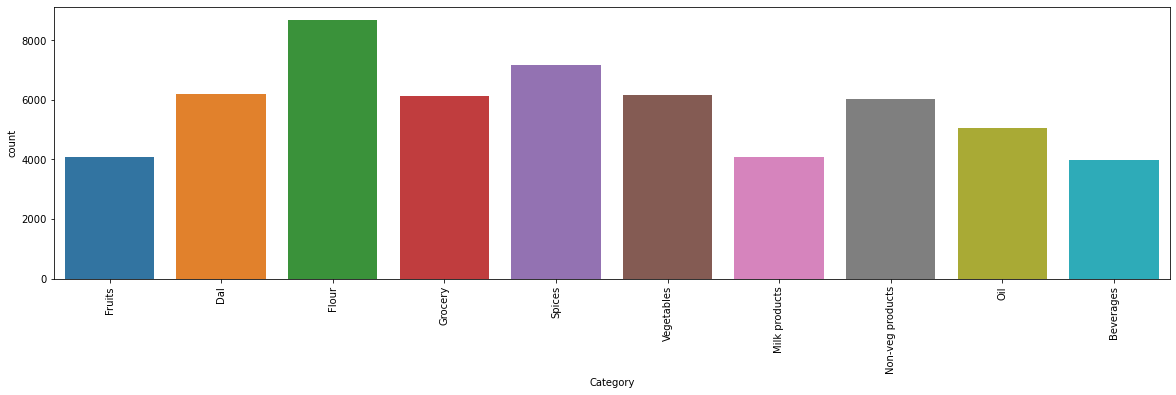

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Category'])
plt.xticks(rotation="vertical")
plt.show()

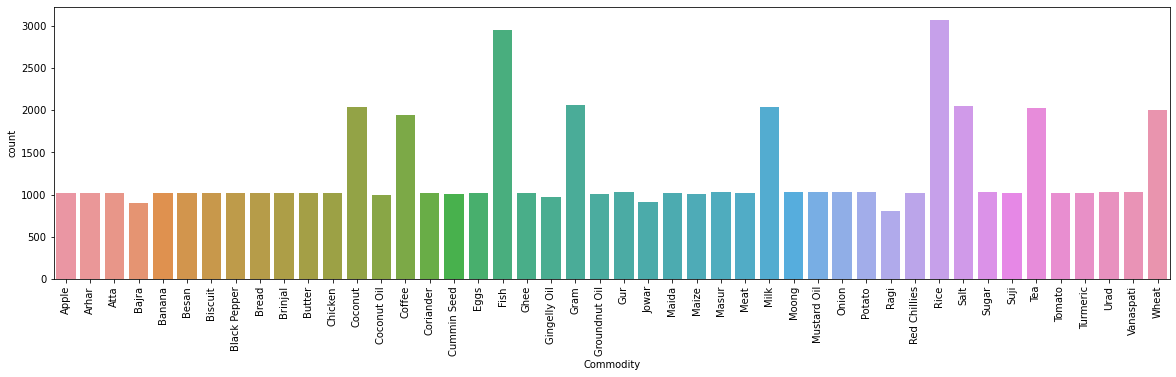

In [44]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Commodity'])
plt.xticks(rotation="vertical")
plt.show()

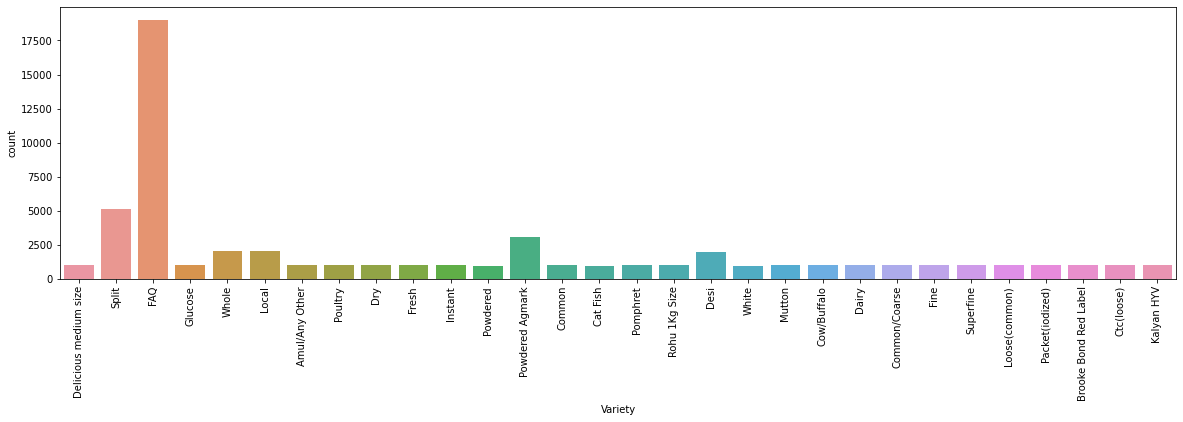

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Variety'])
plt.xticks(rotation="vertical")
plt.show()

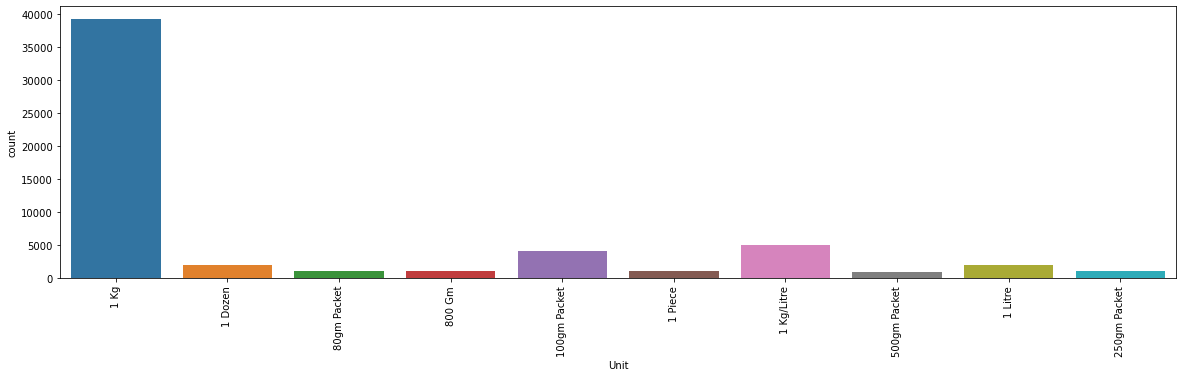

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Unit'])
plt.xticks(rotation="vertical")
plt.show()

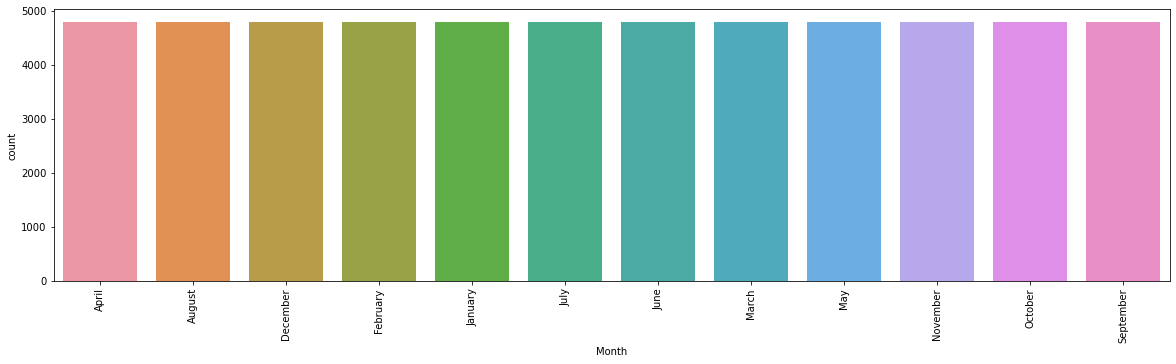

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Month'])
plt.xticks(rotation="vertical")
plt.show()

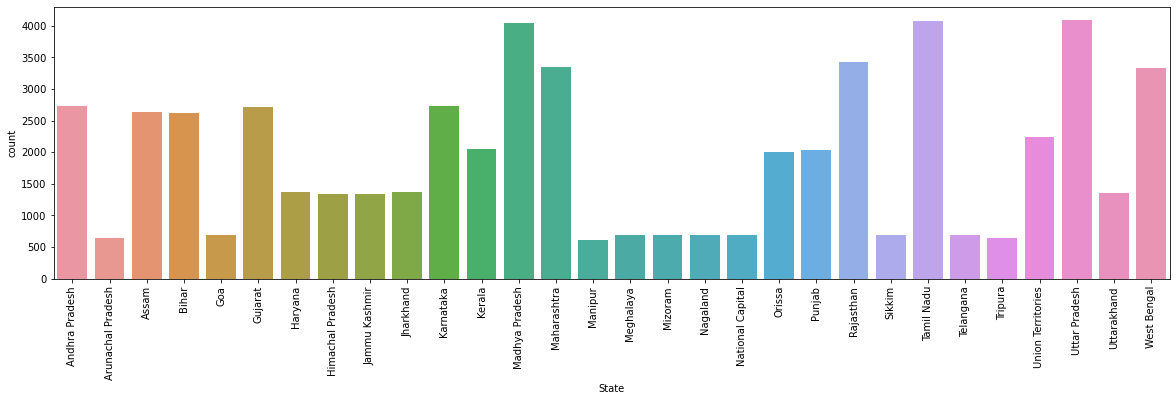

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(sales['State'])
plt.xticks(rotation="vertical")
plt.show()

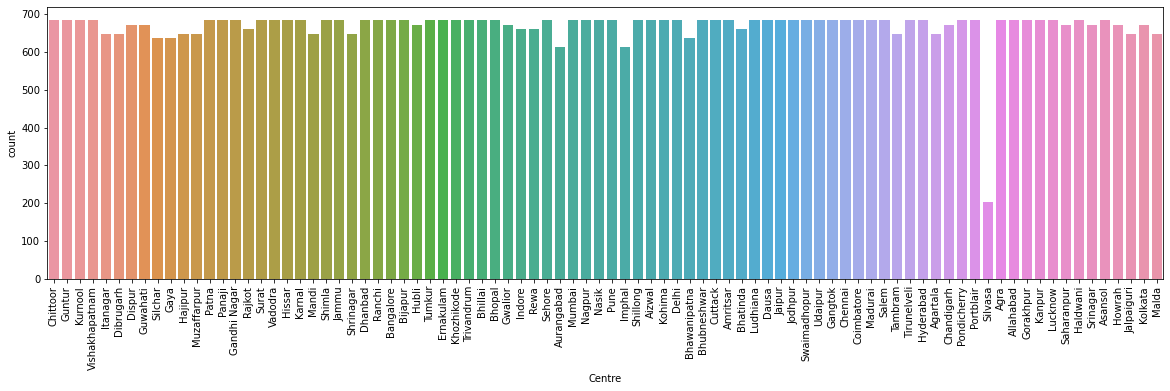

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Centre'])
plt.xticks(rotation="vertical")
plt.show()

In [50]:
sales.head(5)

,State,Centre,Commodity,Variety,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,April,87.529412
1,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,August,92.888889
2,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,December,84.080460
3,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,February,86.858824
4,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1 Kg,January,84.946237


### Building our model

In [51]:
# Define the 'features' and 'labels'
X = sales.drop('Retail Price', axis='columns')
y = sales['Retail Price']

In [52]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
X_train.head(5)

,State,Centre,Commodity,Variety,Category,Unit,Month
37877,Rajasthan,Jaipur,Cummin Seed,Common,Spices,1 Kg,July
30276,Meghalaya,Shillong,Biscuit,Glucose,Grocery,80gm Packet,April
24776,Madhya Pradesh,Indore,Salt,Packet(iodized),Spices,1 Kg,May
23753,Madhya Pradesh,Gwalior,Coffee,Instant,Beverages,500gm Packet,July
53021,Uttarakhand,Haldwani,Coriander,Powdered Agmark,Vegetables,100gm Packet,July


### Linear Regression model

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [55]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,2,3,4,5,6])
], remainder='passthrough')

# Linear Regression model
from sklearn.linear_model import LinearRegression
trf2 = LinearRegression()

# Create Pipeline
model = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [56]:
# evaluating our model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

Mean absolute error:  18.31579259964001
Mean squared error:  1103.448431017151


In [57]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)*100

# Create a dataframe to display accuracy
results_df = pd.DataFrame(data=[["Simple Linear Regression", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,62.956904


### Random Forest Regressor model 

In [58]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,2,3,4,5,6])
], remainder='passthrough')

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
trf2 = RandomForestRegressor(n_estimators=100, random_state=0)

# Create Pipeline
rf = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = rf.predict(X_test)

In [59]:
# evaluating our regressor model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred1))
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Mean absolute error:  3.11320109245716
Mean squared error:  67.46370116708736


In [60]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred1)*100

# Create a dataframe to display accuracy
results_df1 = pd.DataFrame(data=[["Random Forest Regressor", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df1

,Model,Accuracy(%)
0,Random Forest Regressor,97.735223


In [61]:
results_df = results_df.append(results_df1, ignore_index=True)
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,62.956904
1,Random Forest Regressor,97.735223


### XGBoost Regressor

In [62]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,2,3,4,5,6])
], remainder='passthrough')

# XGBoost Regressor
import xgboost as xgb
from xgboost import XGBRegressor
trf2 = XGBRegressor(max_depth=3)

# Create Pipeline
xgb_reg = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = xgb_reg.predict(X_test)

In [63]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred2)*100)

79.9132300653349


##### Hyperparameter tuning in XGBoost Regressor

In [64]:
# Create Transformers
trf1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,2,3,4,5,6])
], remainder='passthrough')

# XGBoost Regressor with optimal hyperparameters
import xgboost as xgb
from xgboost import XGBRegressor
trf2 = XGBRegressor(gamma=0.25, 
                    learning_rate=0.2, 
                    max_depth=7, 
                    n_estimators=1000, 
                    subsample=0.9,
                    colsample_bylevel=0.8, 
                    colsample_bytree=0.8, 
                    min_child_weight=3.0)

# Create Pipeline
xgb = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# Train the model on the training set
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = xgb.predict(X_test)

In [65]:
print("Score: ", xgb.score(X_test, y_test))

Score:  0.9810488561821924


In [66]:
# evaluating our xgb regressor model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred3))
print("Mean squared error: ", mean_squared_error(y_test, y_pred3))

Mean absolute error:  3.6496529501486212
Mean squared error:  56.45211235013991


In [67]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred3)*100

# Create a dataframe to display accuracy
results_df2 = pd.DataFrame(data=[["XGBoost Regressor", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df2

,Model,Accuracy(%)
0,XGBoost Regressor,98.104886


In [68]:
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Accuracy(%)
0,Simple Linear Regression,62.956904
1,Random Forest Regressor,97.735223
2,XGBoost Regressor,98.104886


In [69]:
# Clearly, XGBoost Regressor gave the best score

### Making predictions

In [70]:
X.columns

Index(['State', 'Centre', 'Commodity', 'Variety', 'Category', 'Unit', 'Month'], dtype='object')

In [71]:
# loading the model we will use to make predictions
pred = xgb.predict(X_test)

In [72]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
12728,41.617978,46.942669
57476,34.595506,31.067127
28998,146.081395,146.678406
32506,38.000000,37.030582
7795,38.033333,40.661011
...,...,...
52126,31.363636,31.450871
26405,75.000000,74.893219
31639,40.066667,40.902859
8301,37.678161,35.164307


In [73]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [74]:
X["Retail Price"] = final_df

In [75]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Sales prediction\website\predictions(1).csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


### Dump our models into a pickle file

In [76]:
# dump the ML models into a 'pickle' file
import pickle

pickle.dump(sales, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Sales prediction\website\sales(1).pkl', 'wb'))
pickle.dump(xgb, open(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Sales prediction\website\model(1).pkl', 'wb'))